<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

This notebook establishes the core of the diffusion curvature library. 
Our implementation is structured around the [`ManifoldGraph`](https://professorwug.github.io/diffusion_curvature/core (manifoldgraph).html#manifoldgraph) class, which stores all of the relevant information for our geometric analysis. 
Below this, we define various transforms on the manifold graph:
1. Powering the diffusion matrix
2. Computing Heat Geodesic Distances
3. Computing the wasserstein spread of diffusino
among others.

When convenient, we define each transform directly within this notebook. For some transforms, extra implementation is needed; we source those to other notebooks.

In [1]:
#| echo: false
#| output: asis
show_doc(ManifoldGraph)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/manifold_graph.py#L12){target="_blank" style="float:right; font-size:smaller"}

### ManifoldGraph

>      ManifoldGraph (X=None, dimension=None, kernel_type:str='adaptive',
>                     anisotropic_density_normalization:float=1,
>                     num_neighbors=10, t=10, A=None, P=None, Pt=None, D=None,
>                     *kw_args)

Class for Manifold Graphs. Stores the basic graph information used for geometric analysis: 
A (the affinity/adjacency matrix), P (the diffusion matrix), P^t (the powered diffusion matrix), and D (the manifold distance matrix)
Takes raw points, X. Can also optionally pass in any of the above to save the trouble of recomputing it.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| X | NoneType | None | raw points |
| dimension | NoneType | None | dimension of manifold. |
| kernel_type | str | adaptive | "fixed" or "adaptive" |
| anisotropic_density_normalization | float | 1 | normalize out this amount of the density. 0 is none. 1 is all. |
| num_neighbors | int | 10 | for adaptive kernel, constructs graph to connect this number of neighbors |
| t | int | 10 | steps of diffusion |
| A | NoneType | None |  |
| P | NoneType | None |  |
| Pt | NoneType | None |  |
| D | NoneType | None |  |
| kw_args |  |  |  |

In [2]:
#| echo: false
#| output: asis
show_doc(power_diffusion_matrix)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/manifold_graph.py#L46){target="_blank" style="float:right; font-size:smaller"}

### power_diffusion_matrix

>      power_diffusion_matrix (G:__main__.ManifoldGraph, t:int=None)

## PHATE Distances

Wasserstein Diffusion Curvature -- despite the name -- requires only manifold distances. This saves quite a bit of computation, but doesn't alleviate the need for a good approximation of the manifold's geodesic distance. Here, we implement one straightforward and accurate manifold distance: that proposed by Moon et al. in PHATE (2019). The PHATE distance is an extension of the diffusion distance, except instead of calculating the L2 distances between diffusion coordinates (which corresponds roughly to the rows of the diffusion matrix), it takes the L2 distances between the log-transformed diffusions. This flips the weighting from local to global, as a diffusion that assigns a small mass where another assigns a miniscule mass becomes much further than those that differ only at their centers. This log transform has the additional advantage of, through the WAWA formulation of the heat equation, recovering the distance term.

It is defined as:
$$d_p(x,y) = \| \log(p_y^t)-\log(p_x^t) \|_2 $$

In [3]:
#| echo: false
#| output: asis
show_doc(phate_distances)

---

### phate_distances

>      phate_distances (x, **kwargs)

Delegates (`__call__`,`decode`,`setup`) to (<code>encodes</code>,<code>decodes</code>,<code>setups</code>) if `split_idx` matches

# The Wasserstein Diffusion Curvature
This has two components: computing the spread of diffusion, and computing a "flattened facsimile" of the graph. 

For the second, we presently give a naive implementation that presumes the dimensionality is known and constructs random noise of the same dimension and size.

In [4]:
#| echo: false
#| output: asis
show_doc(wasserstein_spread_of_diffusion)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/manifold_graph.py#L66){target="_blank" style="float:right; font-size:smaller"}

### wasserstein_spread_of_diffusion

>      wasserstein_spread_of_diffusion (G:__main__.ManifoldGraph, idx=None)

Returns how "spread out" each diffusion is, with wasserstein distance"
Presumes that the manifold distances have been separately calculated
If idx is passed, only computes wsd at that index

In [5]:
#| echo: false
#| output: asis
show_doc(entropy_of_diffusion)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/manifold_graph.py#L83){target="_blank" style="float:right; font-size:smaller"}

### entropy_of_diffusion

>      entropy_of_diffusion (G:__main__.ManifoldGraph, idx=None)

In [6]:
#| echo: false
#| output: asis
show_doc(flattened_facsimile_of_graph)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/manifold_graph.py#L91){target="_blank" style="float:right; font-size:smaller"}

### flattened_facsimile_of_graph

>      flattened_facsimile_of_graph (G:__main__.ManifoldGraph, dimension=None)

In [7]:
#| echo: false
#| output: asis
show_doc(diffusion_curvature)

---

### diffusion_curvature

>      diffusion_curvature (x, **kwargs)

Delegates (`__call__`,`decode`,`setup`) to (<code>encodes</code>,<code>decodes</code>,<code>setups</code>) if `split_idx` matches

In [8]:
#| echo: false
#| output: asis
show_doc(diffusion_entropy_curvature)

---

### diffusion_entropy_curvature

>      diffusion_entropy_curvature (x, **kwargs)

Delegates (`__call__`,`decode`,`setup`) to (<code>encodes</code>,<code>decodes</code>,<code>setups</code>) if `split_idx` matches

In [9]:
#| echo: false
#| output: asis
show_doc(plot_manifold_curvature)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/manifold_graph.py#L137){target="_blank" style="float:right; font-size:smaller"}

### plot_manifold_curvature

>      plot_manifold_curvature (G:__main__.ManifoldGraph, title=None)

# Use on Data
To compute the wasserstein diffusion curvature of the data, first put the data into your [`ManifoldGraph`](https://professorwug.github.io/diffusion_curvature/core (manifoldgraph).html#manifoldgraph) object. Supply the dimension of the data, if you know it. Also select the parameters for creating an affinity matrix: the kernel type, the number of neighbors to use, and the degree of anisotropic density normalization.

If you're unsure what value to put for any of these, leave it blank. We'll use heuristics to find a good value for t and use our own dimension fitting to find a good value for that.

Alternately, if already have a graph (A), or any other piece of the puzzle, just supply it as an argument when initializing the [`ManifoldGraph`](https://professorwug.github.io/diffusion_curvature/core (manifoldgraph).html#manifoldgraph) class.

In [ ]:
from diffusion_curvature.datasets import *
X_torus, k_torus_real = torus(n=4000)
print("num nodes", len(X_torus))

num nodes 2021


In [ ]:
G_torus = ManifoldGraph(
    X = X_torus, 
    dimension= 2,
    t = 8,
    anisotropic_density_normalization=1,
    )

/home/piriac/mambaforge/envs/diffusion_curvature/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/piriac/mambaforge/envs/diffusion_curvature/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


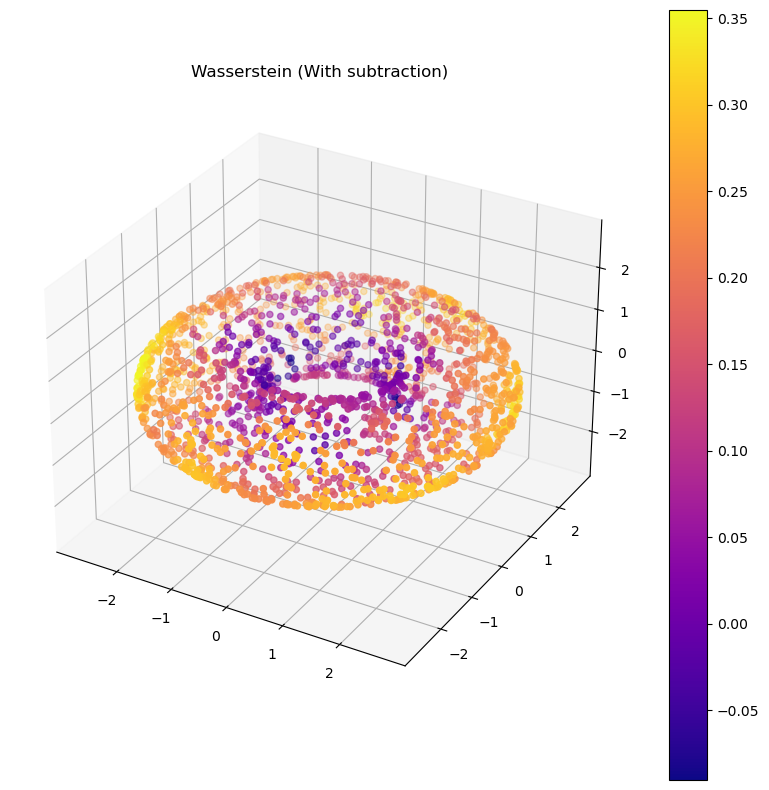

In [ ]:
G_torus = diffusion_curvature(G_torus)
plot_manifold_curvature(G_torus, title="Wasserstein (With subtraction)")

6.311028761552304


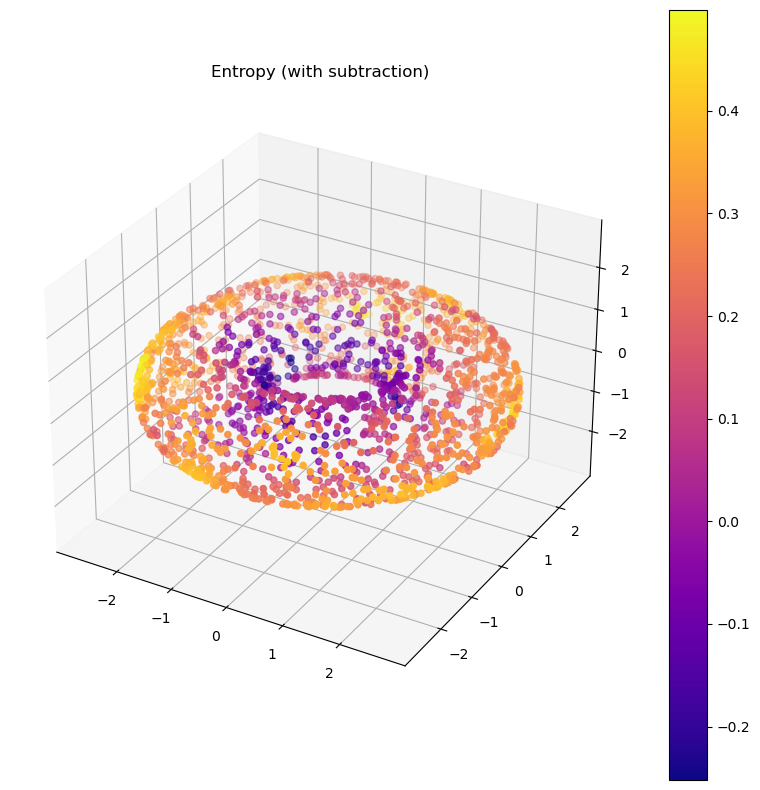

In [ ]:
G_torus = diffusion_entropy_curvature(G_torus)
plot_manifold_curvature(G_torus, "Entropy (with subtraction)")

In [ ]:
k_torus_real

array([ 0.99457493,  1.32435208,  0.41629848, ...,  1.32025171,
       -0.84067858, -0.63401814])